In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Compare new locations with original catalog

In [2]:
df_PNSN = pd.read_csv("../data/events/cascadia_earthquakes_filtered")
df_PNSN

,DateTime,Latitude,Longitude,Depth,Magnitude,MagType,EventID,Source
0,1969/02/14 08:33:36,48.9398,-123.0698,52.0,4.2,d,10835098,PNSN
1,1969/02/28 00:37:04,48.0000,-120.0000,18.0,2.6,d,10835103,PNSN
2,1969/03/20 00:39:12,48.0998,-121.0000,18.0,3.2,d,10835108,PNSN
3,1969/04/12 11:10:30,46.9807,-120.3610,15.4,2.1,d,10835208,PNSN
4,1969/06/11 21:45:08,48.7998,-122.0998,33.0,3.4,d,10835408,PNSN
...,...,...,...,...,...,...,...,...
194517,2024/07/01 06:45:27,46.9080,-121.8878,5.0,0.0,l,62020326,PNSN
194518,2024/07/01 12:53:48,45.3628,-121.7063,-0.5,0.6,l,62020331,PNSN
194519,2024/07/01 17:19:17,48.3517,-122.1638,19.0,0.9,l,62020406,PNSN
194520,2024/07/01 20:06:37,46.7797,-121.8903,9.1,1.0,l,62020476,PNSN


# get NLL located events

In [3]:
data = []
# Open and read the file
with open("./loc/test_loc.sum.grid0.loc.hyp", 'r') as file:
    eventid = None
    for line in file:
        # Extract the eventid from the PUBLIC_ID line
        if line.startswith('PUBLIC_ID'):
            eventid = int(line.split()[1])
        
        # Extract the geographic info from the GEOGRAPHIC line
        if line.startswith('GEOGRAPHIC'):
            parts = line.split()
            date_part = f"{parts[2]}/{parts[3]}/{parts[4]}"
            time_part = f"{parts[5]}:{parts[6]}:{parts[7]}"
            
            # Combine date and time and parse it into a datetime object
            datetime_str = f"{date_part} {time_part}"
            
            lat = float(parts[9])  # Latitude
            lon = float(parts[11])  # Longitude
            depth = float(parts[13])  # Depth
            source = "NLL"
            
            # Append the extracted info to the data list
            data.append([eventid, datetime_str, lon, lat, depth, source])

# Create a DataFrame from the extracted data
df_NLL = pd.DataFrame(data, columns=['EventID', 'DateTime', 'Longitude', 'Latitude', 'Depth', 'Source'])
df_NLL['DateTime'] = pd.to_datetime(df_NLL['DateTime'])
df_NLL

,EventID,DateTime,Longitude,Latitude,Depth,Source
0,61500713,2019-07-12 19:04:35.559365,-121.989034,47.865234,26.502604,NLL
1,61500718,2019-07-15 01:48:25.060547,-122.012295,47.867072,27.484375,NLL
2,61500723,2019-07-15 04:03:53.680912,-121.983629,47.859721,28.263021,NLL
3,61500728,2019-07-16 17:32:52.599775,-122.007392,47.870668,24.945312,NLL
4,61500743,2019-07-16 16:31:57.818746,-122.010515,47.876194,24.539062,NLL
5,61500748,2019-07-12 11:13:03.095827,-122.004569,47.859198,25.723958,NLL
6,61500753,2019-07-12 12:01:19.185672,-122.012164,47.857566,27.755208,NLL
7,61500758,2019-07-12 12:26:46.880081,-122.012561,47.858752,27.518229,NLL
8,61500763,2019-07-12 12:36:21.546334,-122.010233,47.855598,26.028646,NLL
9,61500768,2019-07-13 06:40:15.283036,-121.998090,47.858841,27.585938,NLL


# Merge both dataframes

In [4]:
df_PNSP_filtered = df_PNSN[df_PNSN['EventID'].isin(df_NLL['EventID'])]
df_combined = pd.concat([df_PNSP_filtered, df_NLL], ignore_index=True)
df_combined

,DateTime,Latitude,Longitude,Depth,Magnitude,MagType,EventID,Source
0,2019/07/12 09:51:38,47.872300,-122.013800,29.000000,4.6,l,61535372,PNSN
1,2019/07/12 09:53:58,47.864500,-122.026200,30.800000,3.4,l,61535367,PNSN
2,2019/07/12 09:56:02,47.855300,-122.036000,27.900000,1.8,l,61535377,PNSN
3,2019/07/12 09:59:06,47.862800,-122.025500,27.400000,0.9,d,61535382,PNSN
4,2019/07/12 10:28:57,47.854800,-122.042800,26.000000,1.6,l,61535397,PNSN
...,...,...,...,...,...,...,...,...
67,2019-07-16 07:46:44.677659,47.850322,-121.998547,26.993490,NaN,NaN,61536131,NLL
68,2019-07-16 09:09:36.330659,47.857125,-122.019394,26.773438,NaN,NaN,61536136,NLL
69,2019-07-17 23:43:16.887956,47.855365,-122.046790,24.200521,NaN,NaN,61536697,NLL
70,2019-07-18 04:04:34.109631,47.857884,-122.024737,26.164062,NaN,NaN,61536812,NLL


# Look on a map

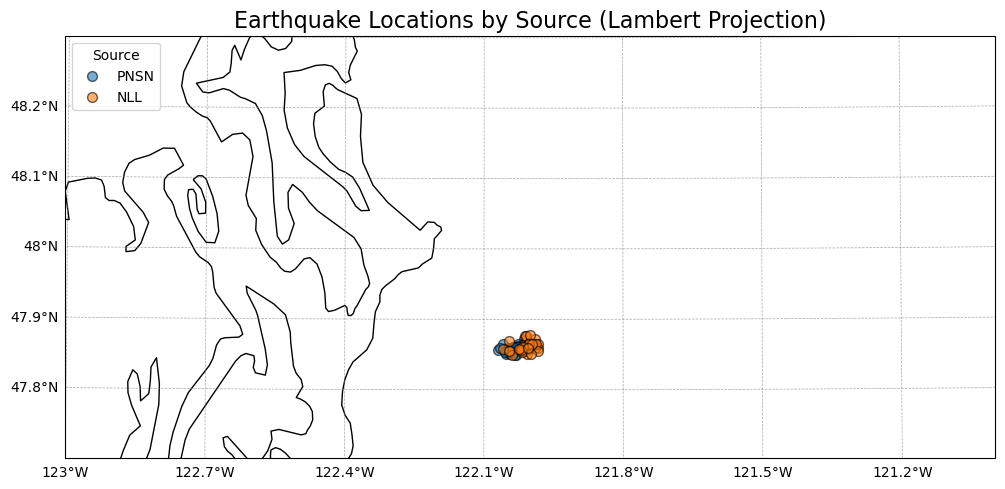

In [14]:
# Create a figure with a specific size and set Lambert Conformal projection
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.AlbersEqualArea(central_longitude=-122, central_latitude=48)})

# Add features to the map
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, facecolor='lightblue')
ax.add_feature(cfeature.RIVERS)

# Set the extent of the map: [west, east, south, north]
ax.set_extent([-123, -121, 47.7, 48.3])

# Plot the data
for source in df_combined['Source'].unique():
    source_data = df_combined[df_combined['Source'] == source]
    ax.scatter(
        source_data['Longitude'],
        source_data['Latitude'],
        label=source,
        s=50,  # Marker size
        alpha=0.6,  # Transparency
        edgecolor='black',  # Edge color for markers
        transform=ccrs.PlateCarree()  # Ensure data is projected correctly
    )

gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.7, linestyle='--', transform=ccrs.PlateCarree())
gl.top_labels = False
gl.right_labels = False
gl.rotate_labels = False

# Add longitude and latitude labels
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
    
# Add title and legend
ax.set_title('Earthquake Locations by Source (Lambert Projection)', fontsize=16)
ax.legend(title='Source', loc='upper left')

# Show the plot
plt.show()

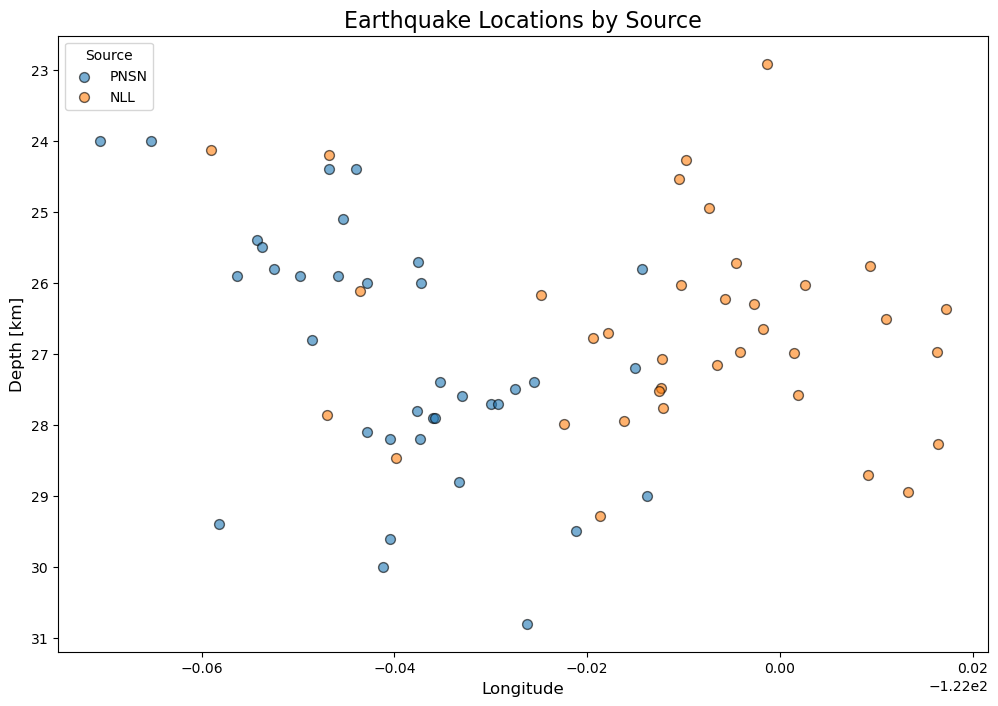

In [17]:
# depth slice along lat
# Create a figure with a specific size and set Lambert Conformal projection
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the data
for source in df_combined['Source'].unique():
    source_data = df_combined[df_combined['Source'] == source]
    ax.scatter(
        source_data['Longitude'],
        source_data['Depth'],
        label=source,
        s=50,  # Marker size
        alpha=0.6,  # Transparency
        edgecolor='black'  # Edge color for markers
    )

# Add longitude and latitude labels
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Depth [km]', fontsize=12)
ax.invert_yaxis()
# Add title and legend
ax.set_title('Earthquake Locations by Source', fontsize=16)
ax.legend(title='Source', loc='upper left')

# Show the plot
plt.show()

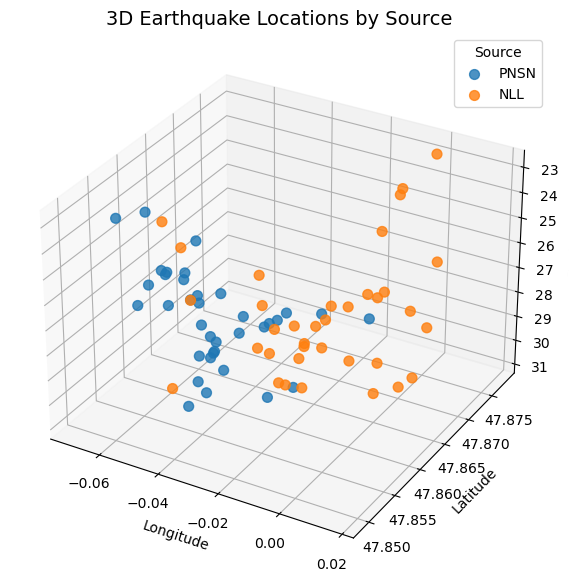

In [19]:
# Set up the figure and the 3D axis
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D scatter plot
for i, source in enumerate(df_combined['Source'].unique()):
    source_data = df_combined[df_combined['Source'] == source]
    ax.scatter(
        source_data['Longitude'],  # x-axis
        source_data['Latitude'],   # y-axis
        source_data['Depth'],      # z-axis
        label=source,
        s=50,   # Marker size
        depthshade=True,
        alpha=0.8
    )

# Add axis labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Depth')

# Invert Z-axis so depth increases downward
ax.invert_zaxis()

# Add legend for Source
ax.legend(title='Source')

# Set plot title
ax.set_title('3D Earthquake Locations by Source', fontsize=14)

# Show the plot
plt.show()